<a href="https://colab.research.google.com/github/SWADESH-KUMAR-NATH/MLnow_2.0/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Topic :** Univariate Linear Regression

[Link to Download the dataset](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

**Date Created :** 12th June , 2021

**Author :**
 Swadesh Kumar Nath

 **Reach Out :**
 [Email](kuswadesh@gmail.com) | [GitHub](https://github.com/SWADESH-KUMAR-NATH) | [Linkedin](linkedin.com/in/swadesh-kumar-nath-b394a1194)

[[Assessment Repository](https://github.com/SWADESH-KUMAR-NATH/MLnow_2.0)]


#Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

In [ ]:
cd '/content/drive/My Drive/colab/ml'

/content/drive/My Drive/colab/ml


In [ ]:
ls

 BankChurners.csv                            student-mat.csv
 cleanedMathData.csv                         student-merge.R
 EDA1.ipynb                                  student-por.csv
 EDA2.ipynb                                  student.txt
 perceptron_training.ipynb                   univariate
'PM2.5 Global Air Pollution 2010-2017.csv'


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

Data loaded 

In [66]:
rawdata=pd.read_csv('BankChurners.csv')

In [67]:
rawdata.shape

(10127, 23)

In [68]:
rawdata.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [70]:
rawdata.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Data processing
Deleted last two columns

In [71]:
rawdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',inplace=True,axis=1)
rawdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',inplace=True,axis=1)

In [72]:
rawdata.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [73]:
rawdata.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [74]:
print(f'Type : {rawdata.Attrition_Flag.unique()}')
print(f'Gender : {rawdata.Gender.unique()}')
print(f'Education Level : {rawdata.Education_Level.unique()}')
print(f'Income Category : {rawdata.Income_Category.unique()}')
print(f'Card Category : {rawdata.Card_Category.unique()}')
print(f'Marital_Status : {rawdata.Marital_Status.unique()}')

Type : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Income Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']



Removing all the rows with any value 'Unknown'

In [75]:
data1=rawdata  # necessary for back-up

In [ ]:
rawdata=data1  # if got 'none' for all rows then only ehxecute

In [76]:
# rawdata.dropna('Unknown',how='any',axis=0,inplace=True)   # didn't get the algo for deleting rows with any value 'Unknown'
rawdata=rawdata[(rawdata.Education_Level!='Unknown') & (rawdata.Income_Category!='Unknown') & (rawdata.Marital_Status!='Unknown')]

In [77]:
rawdata.shape

(7081, 21)

In [78]:
rawdata.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [79]:
print(f'Type : {rawdata.Attrition_Flag.unique()}')
print(f'Gender : {rawdata.Gender.unique()}')
print(f'Education Level : {rawdata.Education_Level.unique()}')
print(f'Income Category : {rawdata.Income_Category.unique()}')
print(f'Card Category : {rawdata.Card_Category.unique()}')
print(f'Marital_Status : {rawdata.Marital_Status.unique()}')

Type : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education Level : ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Income Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Marital_Status : ['Married' 'Single' 'Divorced']


## categorical to numeric value conversion

In [80]:
# binary valued
rawdata['Attrition_Flag']=rawdata['Attrition_Flag'].apply({'Existing Customer':1,'Attritied Customer':0}.get)
rawdata['Gender']=rawdata['Gender'].apply({'M':1,'F':2}.get)
# multi valued
rawdata['Education_Level']=rawdata['Education_Level'].apply({'High School':2, 'Graduate':4 ,'Uneducated':1 ,'College':3, 'Post-Graduate':5,'Doctorate':6}.get)
rawdata['Income_Category']=rawdata['Income_Category'].apply({'$60K - $80K':3, 'Less than $40K':1, '$80K - $120K':4, '$40K - $60K':2, '$120K +':5}.get)
rawdata['Card_Category']=rawdata['Card_Category'].apply({'Blue' :1,'Silver':2, 'Gold':3, 'Platinum':4}.get)
rawdata['Marital_Status']=rawdata['Marital_Status'].apply({'Married':2, 'Single':1, 'Divorced':3}.get)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [81]:
rawdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1.0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1.0,49,2,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1.0,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,1.0,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1.0,44,1,2,4,2,2,1,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


# Data Visualization

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data=rawdata
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


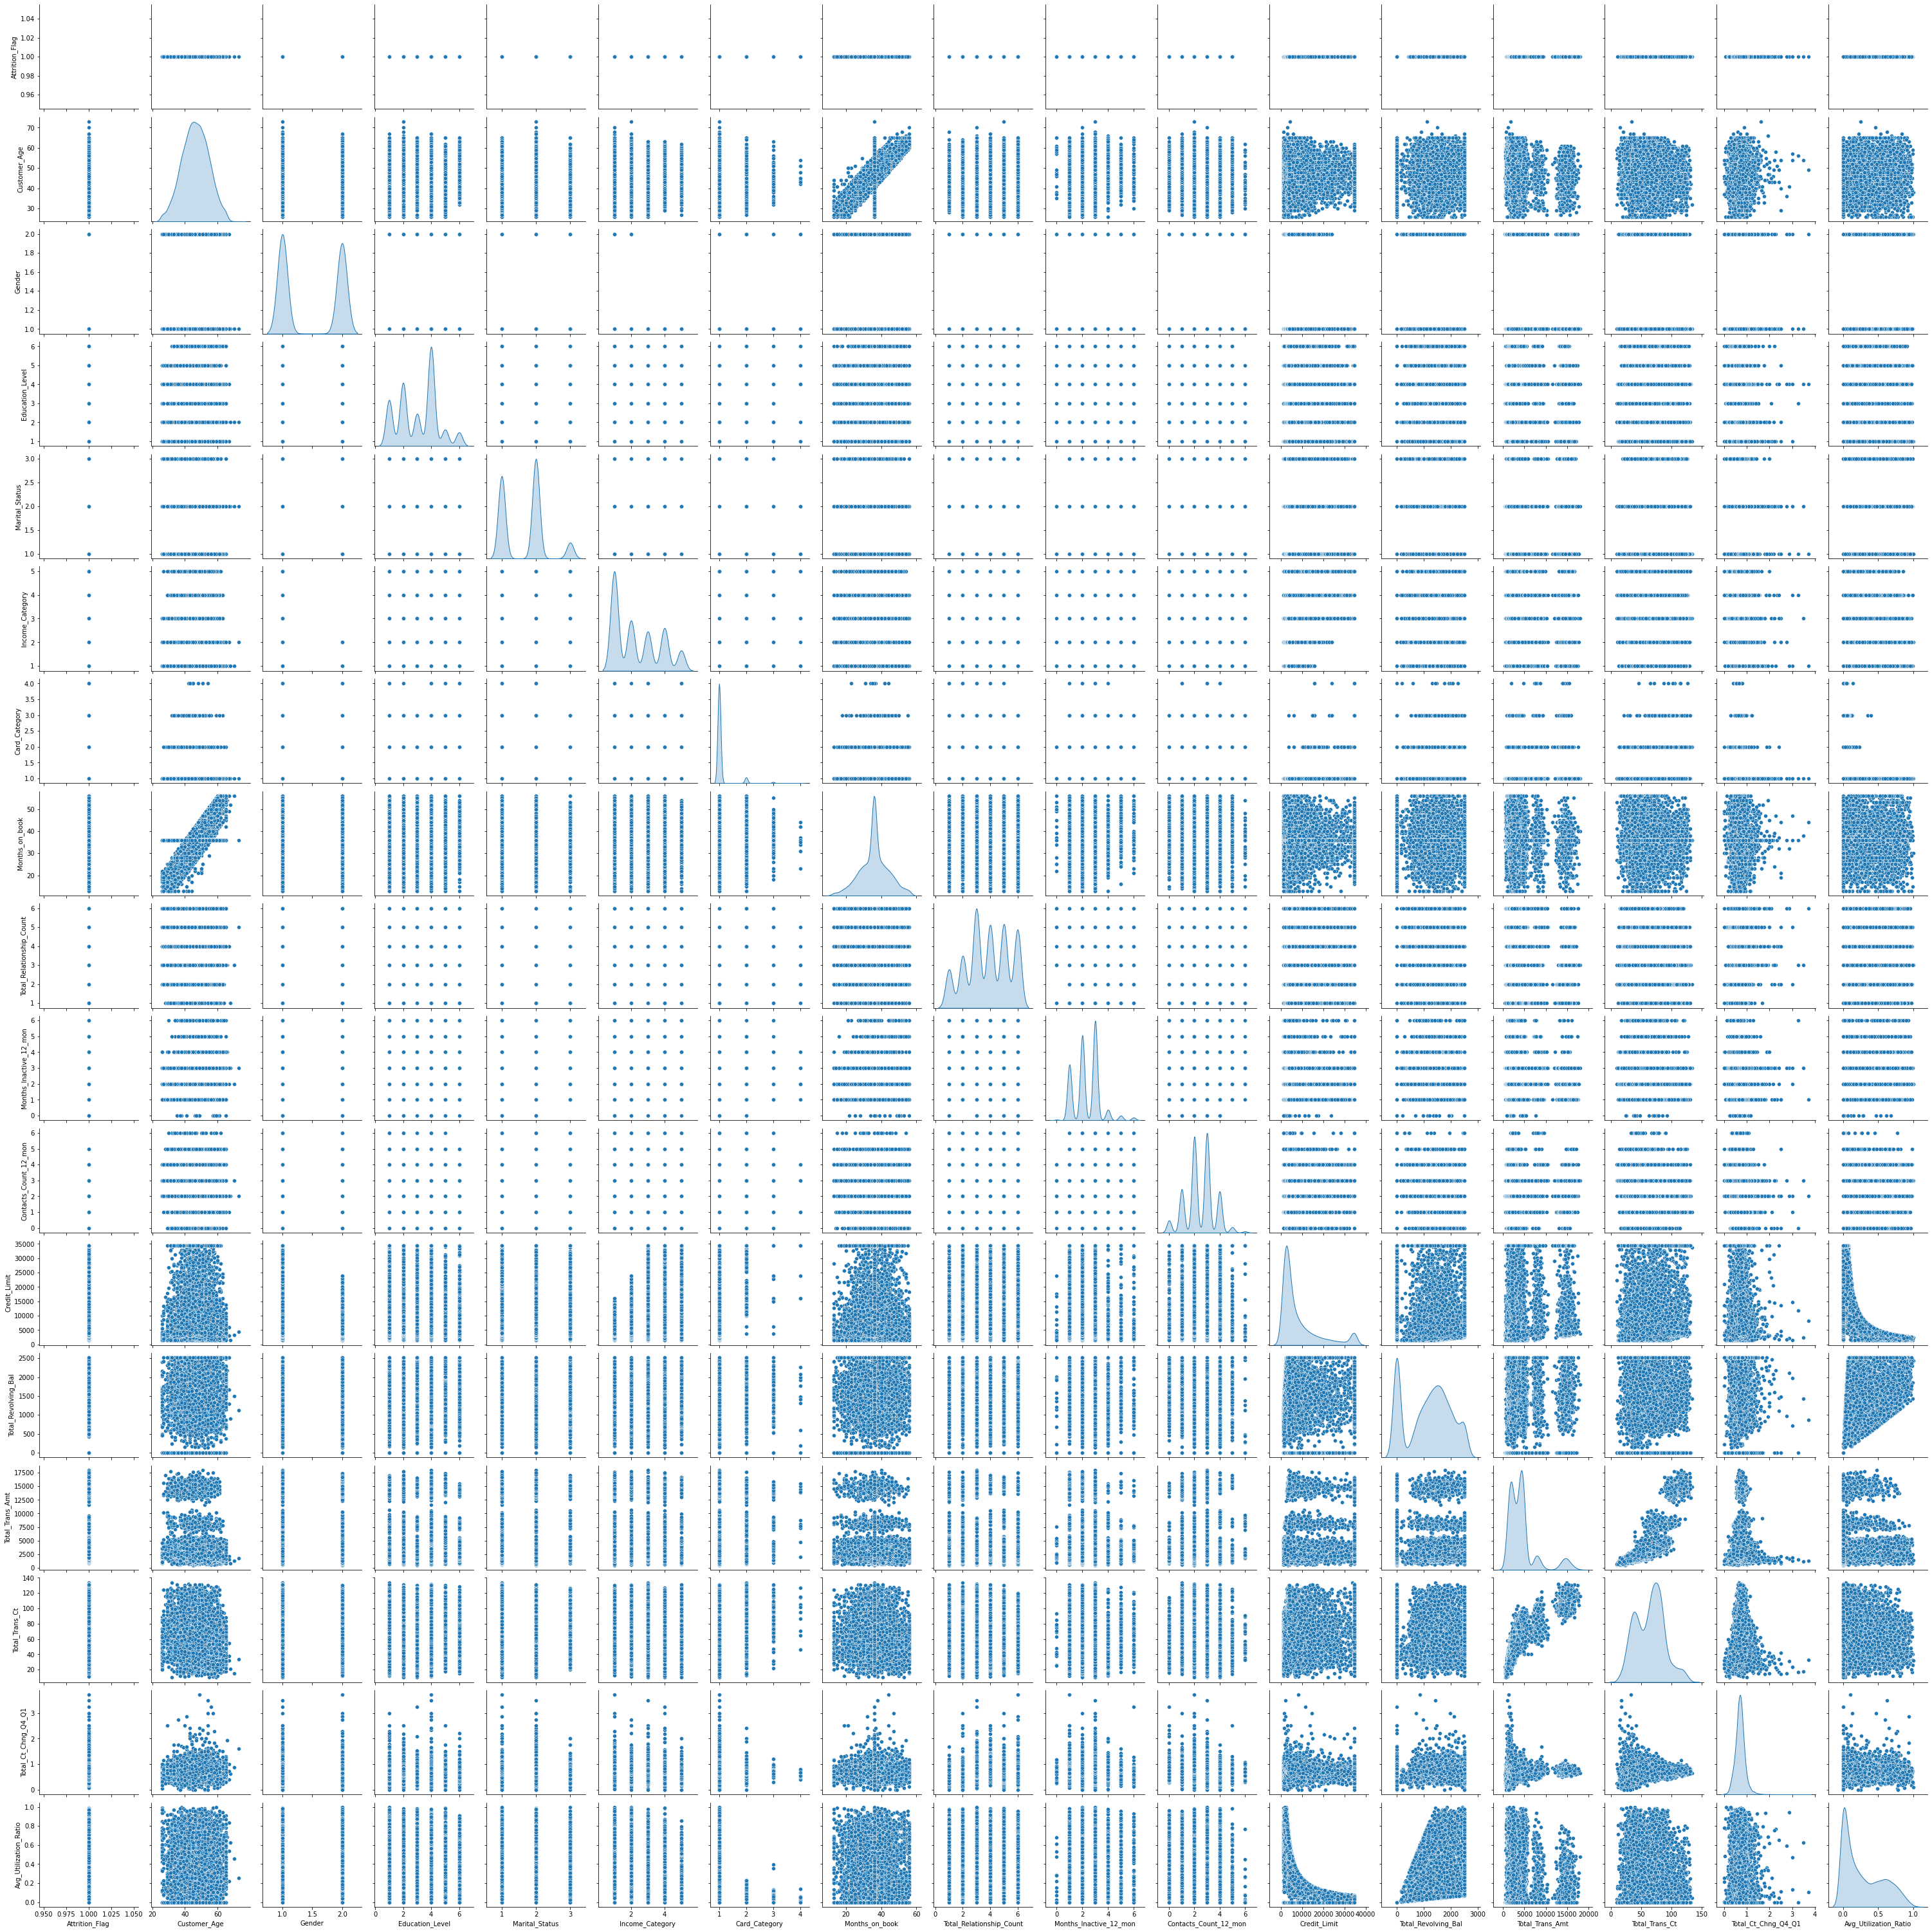

In [84]:
a=[ 'Attrition_Flag', 'Customer_Age', 'Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
sns.pairplot(data,x_vars=a,y_vars=a,diag_kind='kde')

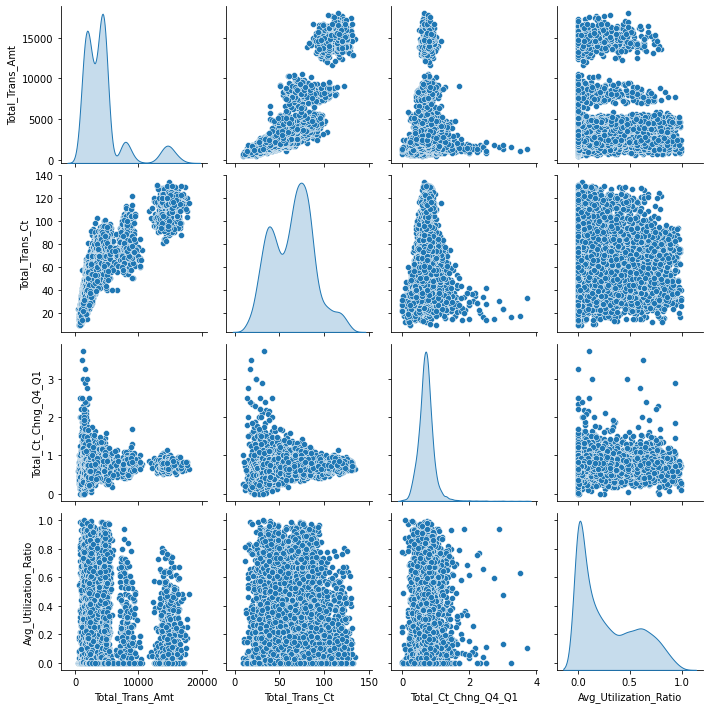

In [85]:
a=['Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
sns.pairplot(data,x_vars=a,y_vars=a,diag_kind='kde')

# Data Splitting

In [88]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [111]:
traindata=data[['Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].sample(frac=0.8,random_state=0)
testdata=data[['Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].drop(traindata.index)

print(traindata.head())
print(testdata.head())

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
6432                0.732                  0.412
7601                0.592                  0.245
326                 0.581                  0.224
7495                0.516                  0.397
693                 0.524                  0.976
    Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0                 1.625                  0.061
12                3.250                  0.000
36                1.176                  0.757
42                1.200                  0.145
43                1.000                  0.000


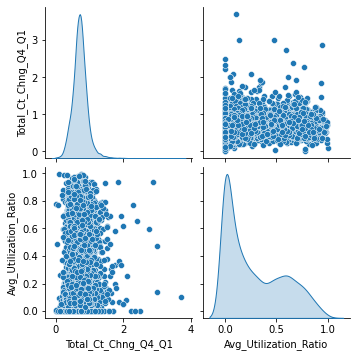

In [112]:
a=['Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
sns.pairplot(traindata,x_vars=a,y_vars=a,diag_kind='kde')

In [113]:
trainlabels=traindata['Total_Ct_Chng_Q4_Q1']
trainfeatures=traindata['Avg_Utilization_Ratio']

testlabels=testdata['Total_Ct_Chng_Q4_Q1']
testfeatures=testdata['Avg_Utilization_Ratio']

# Model

In [114]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [116]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['mae','mse'])

In [117]:
history=model.fit(x=trainfeatures,y=trainlabels,validation_data=(testfeatures,testlabels),epochs=1000)

Epoch 1/1000
178/178 [==============================] - 1s 2ms/step - loss: 0.4073 - mae: 0.4073 - mse: 0.2393 - val_loss: 0.3755 - val_mae: 0.3755 - val_mse: 0.2135
Epoch 2/1000
178/178 [==============================] - 0s 1ms/step - loss: 0.3310 - mae: 0.3310 - mse: 0.1637 - val_loss: 0.3072 - val_mae: 0.3072 - val_mse: 0.1548
Epoch 3/1000
178/178 [==============================] - 0s 1ms/step - loss: 0.2724 - mae: 0.2724 - mse: 0.1184 - val_loss: 0.2558 - val_mae: 0.2558 - val_mse: 0.1179
Epoch 4/1000
178/178 [==============================] - 0s 1ms/step - loss: 0.2303 - mae: 0.2303 - mse: 0.0902 - val_loss: 0.2203 - val_mae: 0.2203 - val_mse: 0.0954
Epoch 5/1000
178/178 [==============================] - 0s 1ms/step - loss: 0.2011 - mae: 0.2011 - mse: 0.0732 - val_loss: 0.1962 - val_mae: 0.1962 - val_mse: 0.0817
Epoch 6/1000
178/178 [==============================] - 0s 1ms/step - loss: 0.1818 - mae: 0.1818 - mse: 0.0634 - val_loss: 0.1810 - val_mae: 0.1810 - val_mse: 0.0741
Epoc

In [119]:
print(history)

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


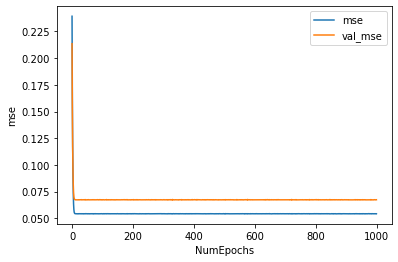

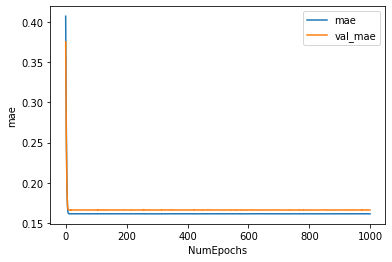

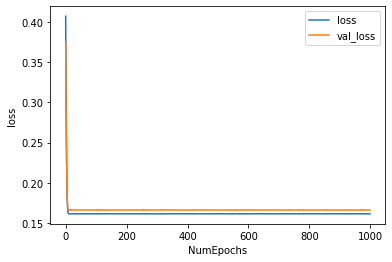

In [124]:
def curveplot(b):
  plt.plot(history.history[b])
  plt.plot(history.history[f'val_{b}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(b)
  plt.legend([b,f'val_{b}'])
  plt.show()

curveplot('mse')
curveplot('mae')
curveplot('loss')


In [125]:
model.predict([1])

array([[0.73766583]], dtype=float32)

In [127]:
a=[1,2,3,4]
out=model.predict(a)
print(f'''
input : {a}
prediction : {out}
prediction (flattened out) : {out.flatten()}
''')


input : [1, 2, 3, 4]
prediction : [[0.73766583]
 [0.7936598 ]
 [0.8496537 ]
 [0.90564764]]
prediction (flattened out) : [0.73766583 0.7936598  0.8496537  0.90564764]



In [128]:
testfeatures

0        0.061
12       0.000
36       0.757
42       0.145
43       0.000
         ...  
10084    0.198
10102    0.223
10103    0.000
10109    0.000
10122    0.462
Name: Avg_Utilization_Ratio, Length: 1416, dtype: float64

In [130]:
testpreds=model.predict(testfeatures).flatten()
print(testpreds)

[0.68508756 0.6816719  0.72405934 ... 0.6816719  0.6816719  0.7075411 ]


In [132]:
testlabels

0        1.625
12       3.250
36       1.176
42       1.200
43       1.000
         ...  
10084    0.754
10102    0.757
10103    0.791
10109    0.820
10122    0.857
Name: Total_Ct_Chng_Q4_Q1, Length: 1416, dtype: float64

In [135]:
error=testdata[['Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']]
error['Predicted']=testpreds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
error.tail()

,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1,Predicted
10084,0.198,0.754,0.692759
10102,0.223,0.757,0.694159
10103,0.000,0.791,0.681672
10109,0.000,0.820,0.681672
10122,0.462,0.857,0.707541


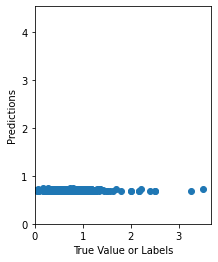

In [145]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testlabels, testpreds)

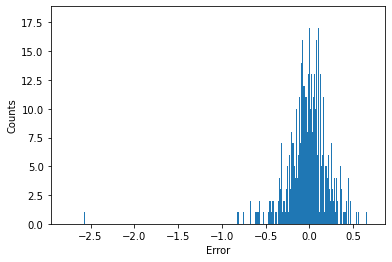

In [147]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testpreds, testlabels, 1000)